spreading:
simulate ,using the "NDlib" python library ,the diffusion models discussed during the course (SI,SIS,SIR,Threshol model) both on the crawled data on synthetic graphs (ER and VA).
Analyse the simulation  results varying boath model parameters  and initial conditions().
----------------------
opinion dynamics : simulate ,using the "NDlib" python library , the opinion dynamics model discussed during the course () boath on the crawled data and in mean-field setting(). 
Analyse the simulation results varying boath model parameters  and initial conditions.

In [ ]:
from google.colab import files 
uploaded = files.upload ()

Saving weighted_net_amsterdam.csv to weighted_net_amsterdam (1).csv


In [1]:
import networkx as nx

In [2]:
from networkx import bipartite

In [3]:
import dynetx as dn

In [4]:
import matplotlib.pyplot as plt

In [5]:
import ndlib.models.ModelConfig as mc

In [6]:
import ndlib.models.epidemics as ep

In [7]:
from ndlib.utils import multi_runs

In [8]:
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend

In [9]:
from ndlib.viz.bokeh.DiffusionPrevalence import DiffusionPrevalence

In [10]:
from ndlib.viz.bokeh.MultiPlot import MultiPlot

In [15]:
from ndlib.viz.mpl.DiffusionTrend import DiffusionTrend

In [16]:
from ndlib.viz.mpl.TrendComparison import DiffusionTrendComparison

In [13]:
import numpy as np

In [14]:
from ndlib.viz.mpl.DiffusionPrevalence import DiffusionPrevalence

## 0 - Load Dataset

In [17]:
def read_net_w(filename):
    g = nx.Graph() #omadim az networkx ye graph dorost kardim gozashtim to g
    with open(filename) as f:# baraye baz karande file ha
        f.readline()#motghayere open kardane file ha
        for l in f:#shomarande (l ta f) 
            l = l.split(",")#ta jaee pish mire k vilgol hasat
            g.add_node(l[0], bipartite = 0)#node ezafe mikone az l 0 => ke l0 tedad satr hast va l1 tedad sotone hast
            g.add_node(l[1], bipartite = 1)
            g.add_edge(l[0], l[1], weight=int(l[2]))#baraye edge 
            
    return g

In [18]:
g_l = read_net_w(f'weighted_net_amsterdam.csv')#khondane data set va mifresete be tabe natije miad to g

## 1 - projected graph

In [19]:
top_nodes = {n for n, d in g_l.nodes(data=True) if d["bipartite"] == 0}

In [20]:
bottom_nodes = set(g_l) - top_nodes

In [21]:
def my_weight(G, u, v, weight="weight"):
    w = 0
    for nbr in set(G[u]) & set(G[v]):
        w += G[u][nbr].get(weight, 1) + G[v][nbr].get(weight, 1)
    return w

In [22]:
g = bipartite.generic_weighted_projected_graph(g_l, list(top_nodes), weight_function=my_weight)

In [23]:
print(nx.info(g))#info g hast

Name: 
Type: Graph
Number of nodes: 11110
Number of edges: 1260952
Average degree: 226.9941


---


### 2 - Model Selection

In [24]:
model_SIR=ep.SIRModel(g)

In [25]:
model_SI=ep.SIModel(g)

In [26]:
model_SIS=ep.SISModel(g)

In [27]:
model_T=ep.ThresholdModel(g)

## 3 - Model Configuration

In [28]:
cfg_si=mc.Configuration()
cfg_sis=mc.Configuration()
cfg_sir=mc.Configuration()
cfg_thres=mc.Configuration()

In [29]:
cfg_si.add_model_parameter('beta', 0.005)#we put as beta a lower value because our contact are indirect
cfg_si.add_model_parameter("percentage_infected", 0.01)

In [30]:
cfg_sis.add_model_parameter('beta', 0.005)# in this case beta/gamma = R0 >1
cfg_sis.add_model_parameter('lambda',0.0001)
cfg_sis.add_model_parameter("percentage_infected", 0.01)

In [31]:
cfg_sir.add_model_parameter('beta', 0.005)
cfg_sir.add_model_parameter('gamma', 0.01)
cfg_sir.add_model_parameter("percentage_infected", 0.01)

In [32]:
cfg_thres.add_model_parameter("percentage_infected", 0.01)

##  Setting node parameters

In [33]:
def set_model_fun():#cfg miad ro model haee ke sakhtim status haso set mikone roye om model ha
    model_SIR.set_initial_status(cfg_sir)
    model_SI.set_initial_status(cfg_si)
    model_SIS.set_initial_status(cfg_sis)
    

In [34]:
def tsh_fun():#tabe e ke miad treshold ro hesab mikone 
    threshold = 0.01
    
    for i in g.nodes():
        cfg_thres.add_node_configuration("threshold", i, threshold)
    model_T.set_initial_status(cfg_thres)

In [35]:
tsh_fun()

In [36]:
set_model_fun()

## 4 - Simulation

In [37]:
iterations_SIR=model_SIR.iteration_bunch(100)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.11it/s]


In [38]:
iterations_SI=model_SI.iteration_bunch(100)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:13<00:00,  7.49it/s]


In [39]:
iterations_SIS=model_SIS.iteration_bunch(100)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:14<00:00,  7.02it/s]


In [40]:
iterations_T = model_T.iteration_bunch(20)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  8.08it/s]


In [41]:
trends_SIR=model_SIR.build_trends(iterations_SIR)#motegayere tekrare on shabih sazimoneh bareye masir ro besazeh 

In [42]:
trends_SI=model_SI.build_trends(iterations_SI)

In [43]:
trends_SIS=model_SIS.build_trends(iterations_SIS)

In [44]:
trends_T = model_T.build_trends(iterations_T)

## 5 - Visualize the results

Diffusion trend plots

In [45]:
#The prevalence plot captures the variation (delta) of nodes for each status in consecutive iterations

In [46]:
viz_SIR = DiffusionTrend(model_SIR, trends_SIR)

In [47]:
viz_SI = DiffusionTrend(model_SI, trends_SI)

In [48]:
viz_SIS = DiffusionTrend(model_SIS, trends_SIS)

In [49]:
viz_T = DiffusionTrend(model_T, trends_T)

In [50]:
%matplotlib inline

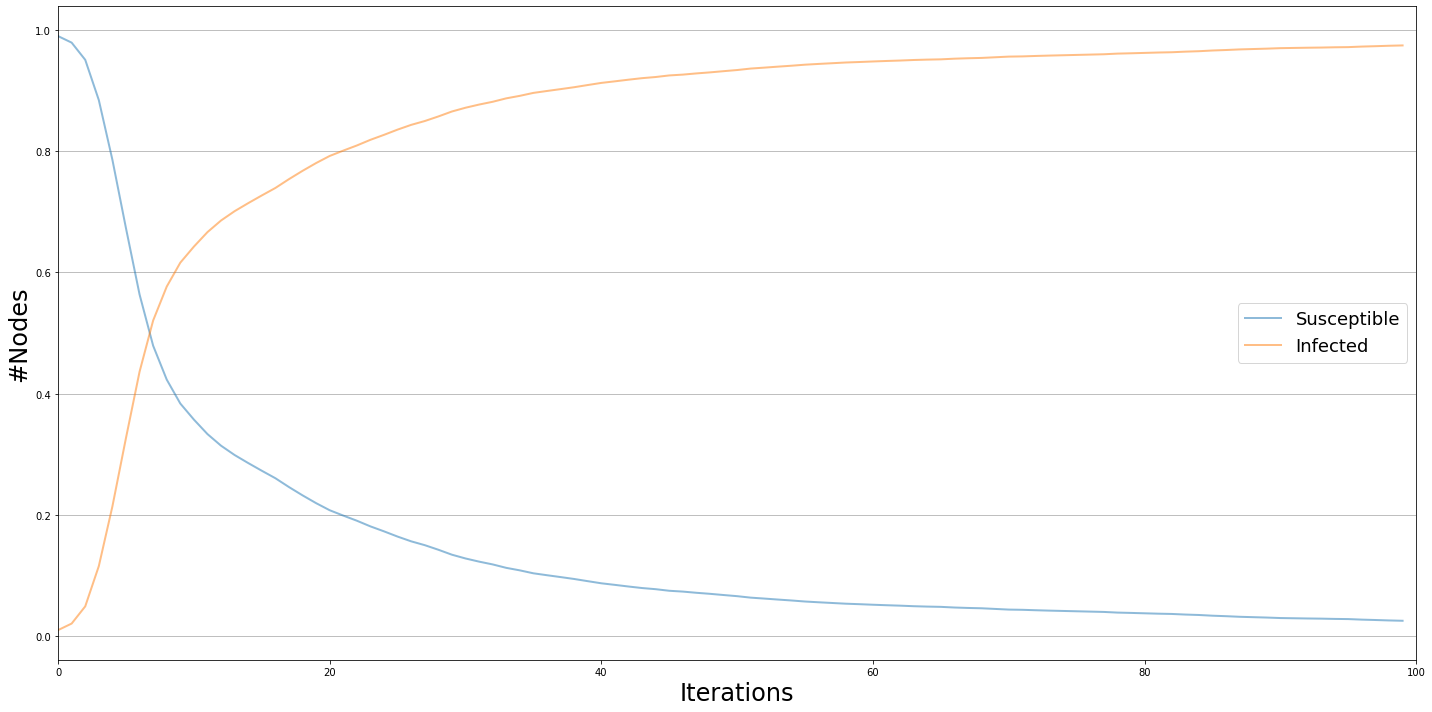

In [51]:
viz_SI.plot()

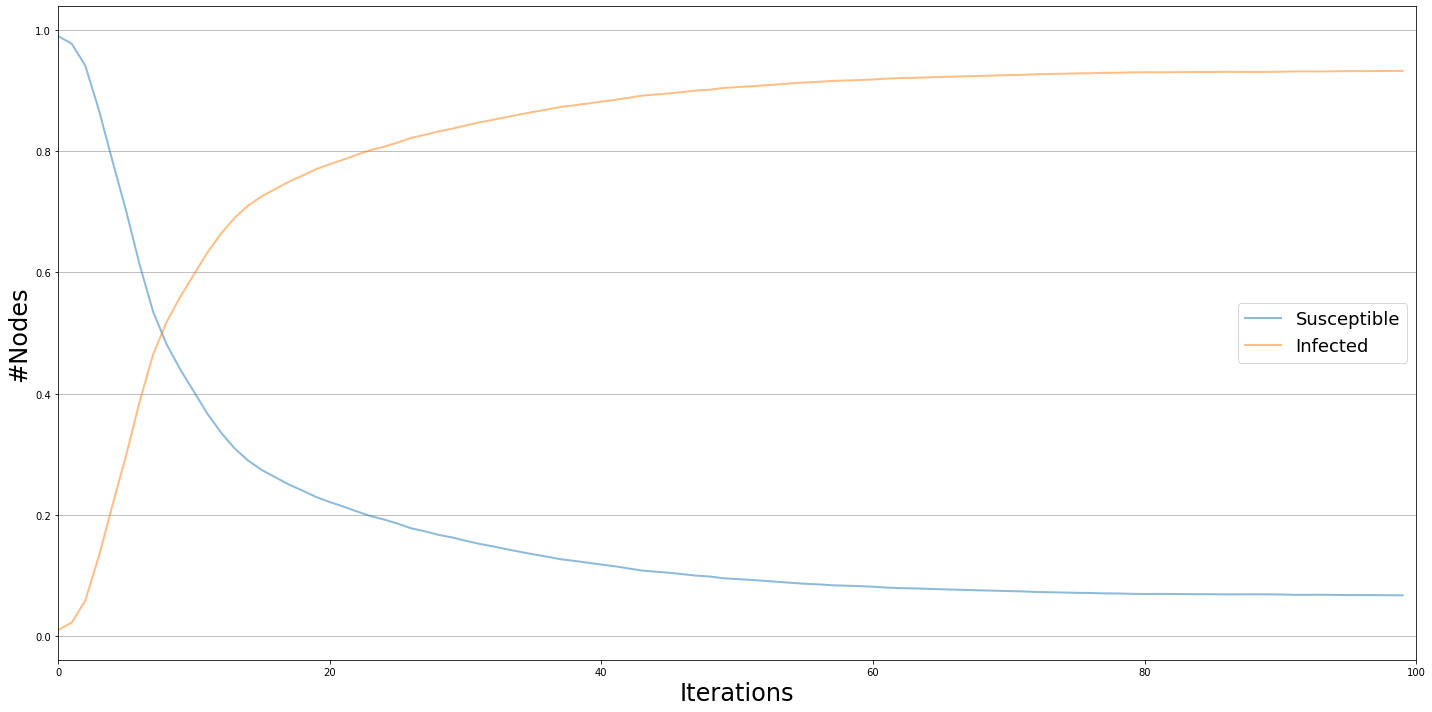

In [52]:
viz_SIS.plot()

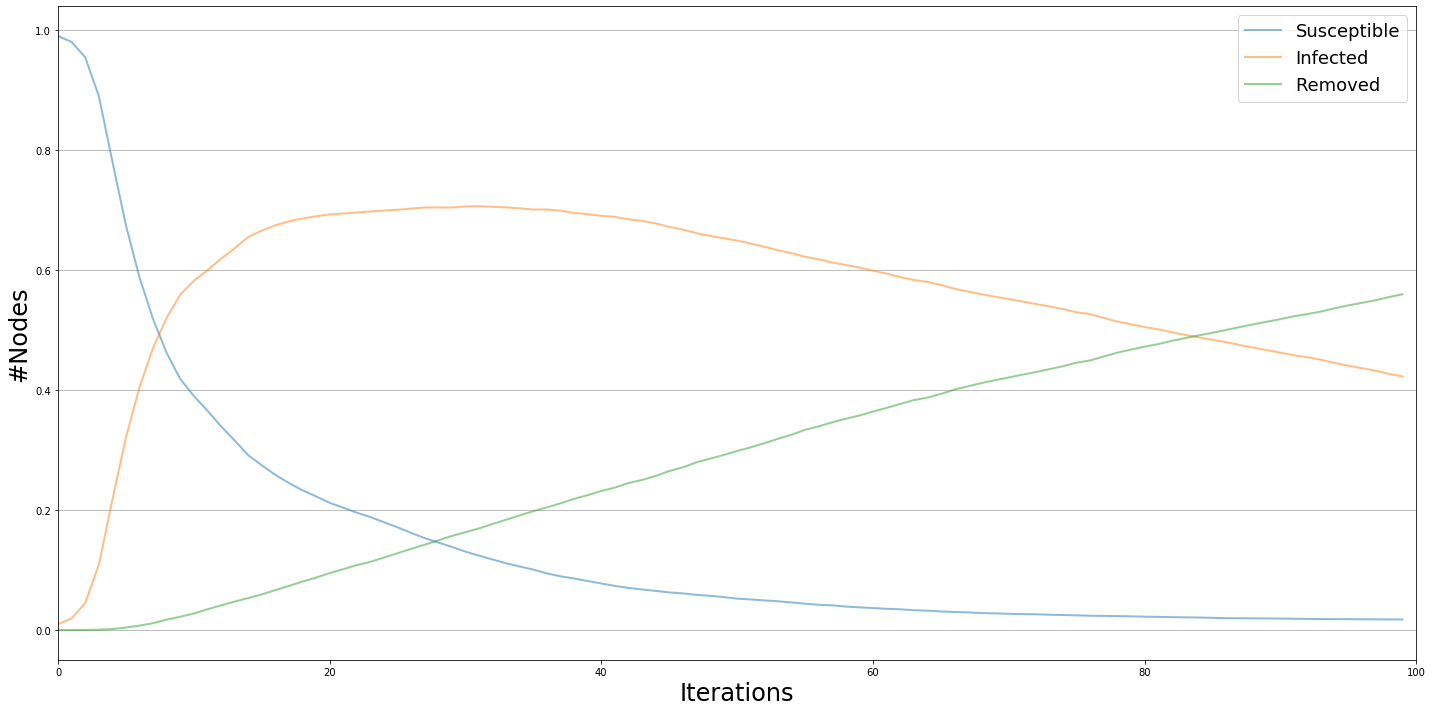

In [53]:
viz_SIR.plot()

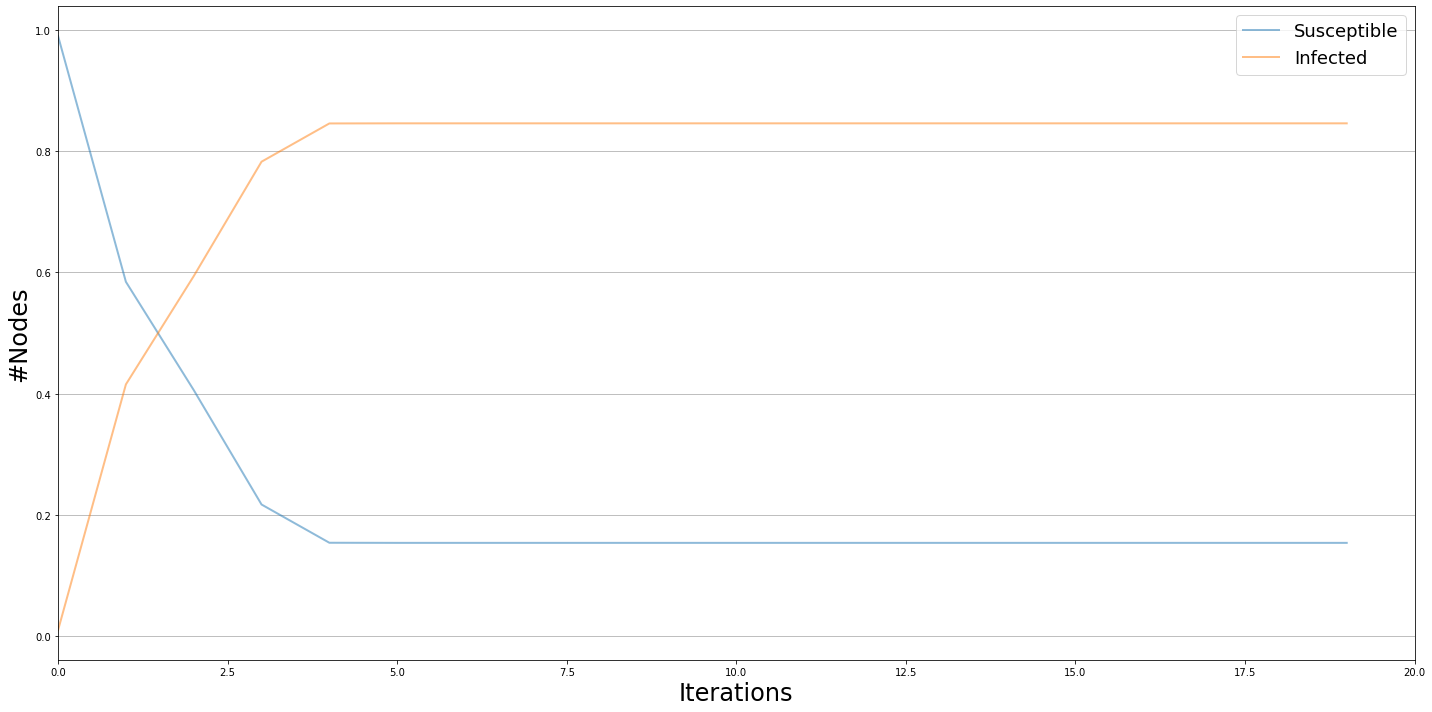

In [54]:
viz_T.plot()

Diffusion prevalence plots

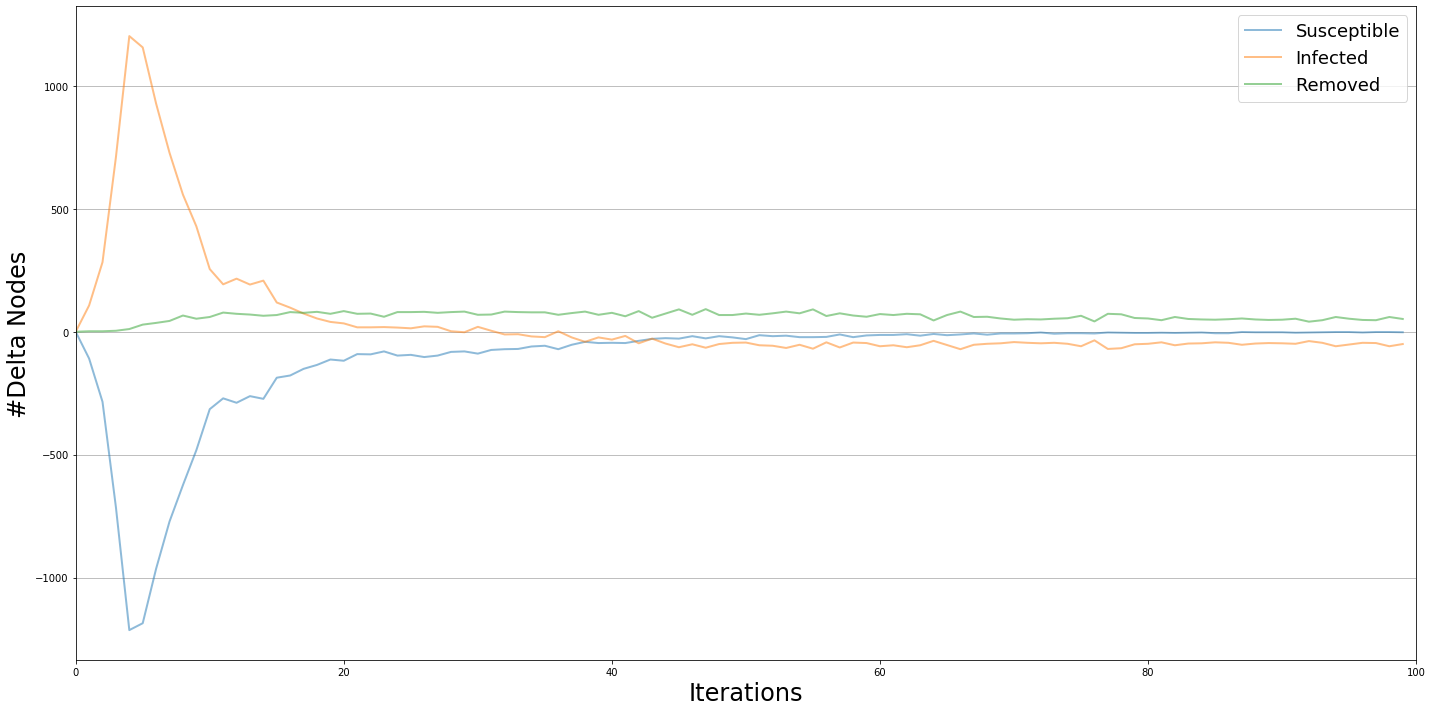

In [55]:
viz_sir = DiffusionPrevalence(model_SIR, trends_SIR)
viz_sir.plot()

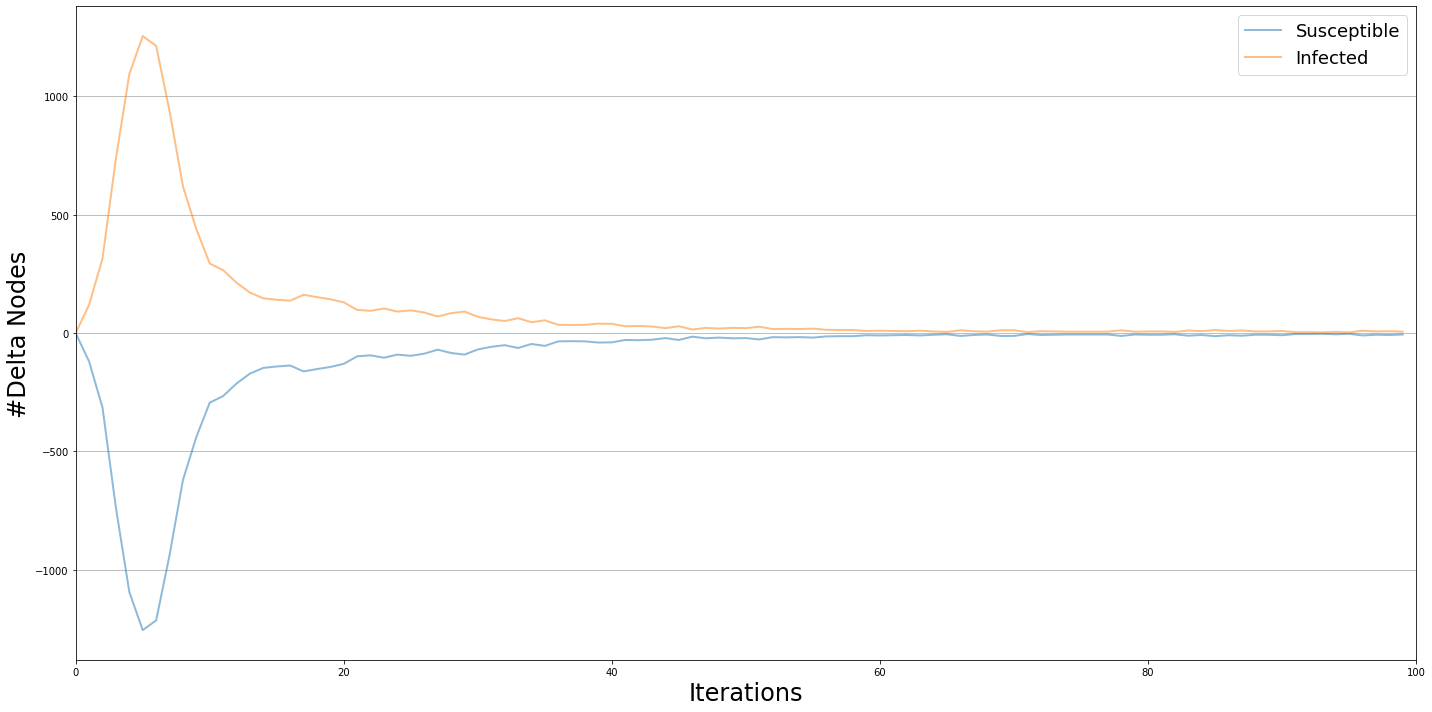

In [56]:
viz_si = DiffusionPrevalence(model_SI, trends_SI)
viz_si.plot()

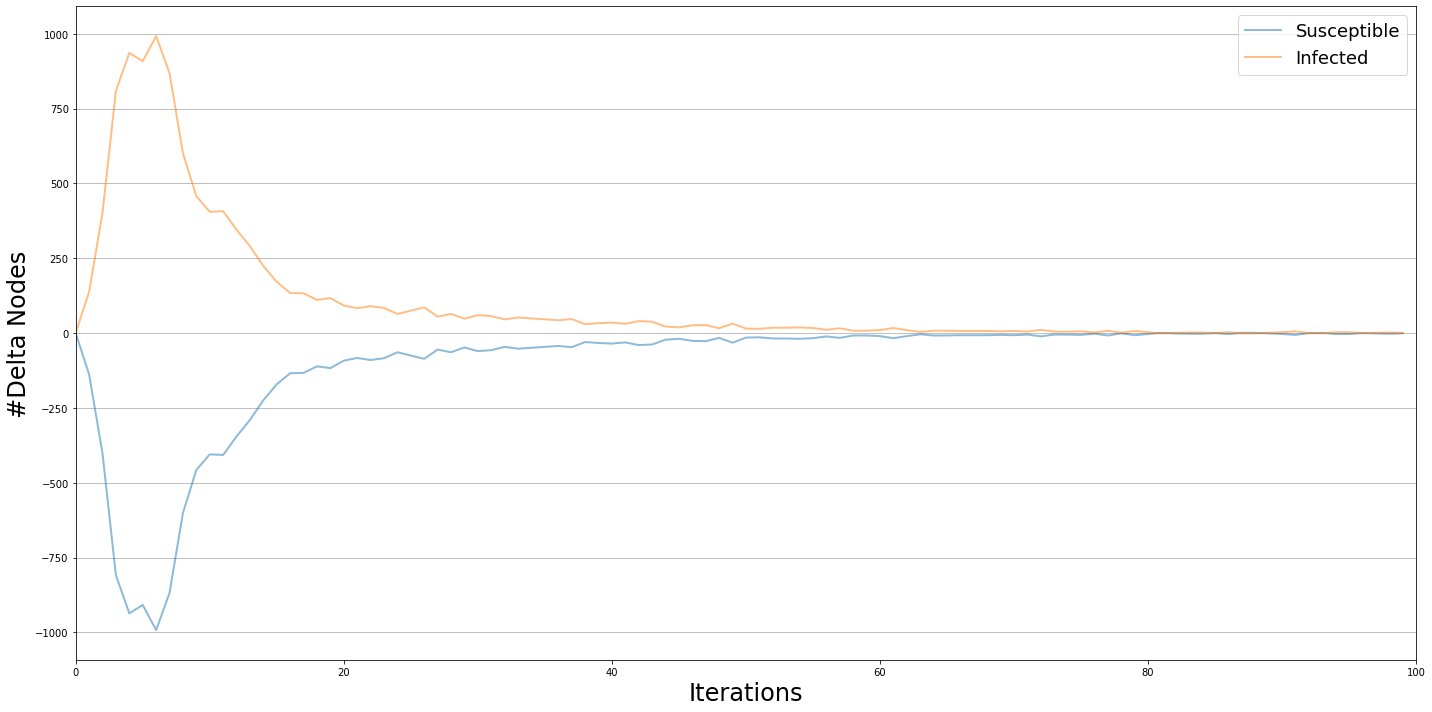

In [57]:
viz_sis = DiffusionPrevalence(model_SIS, trends_SIS)
viz_sis.plot()

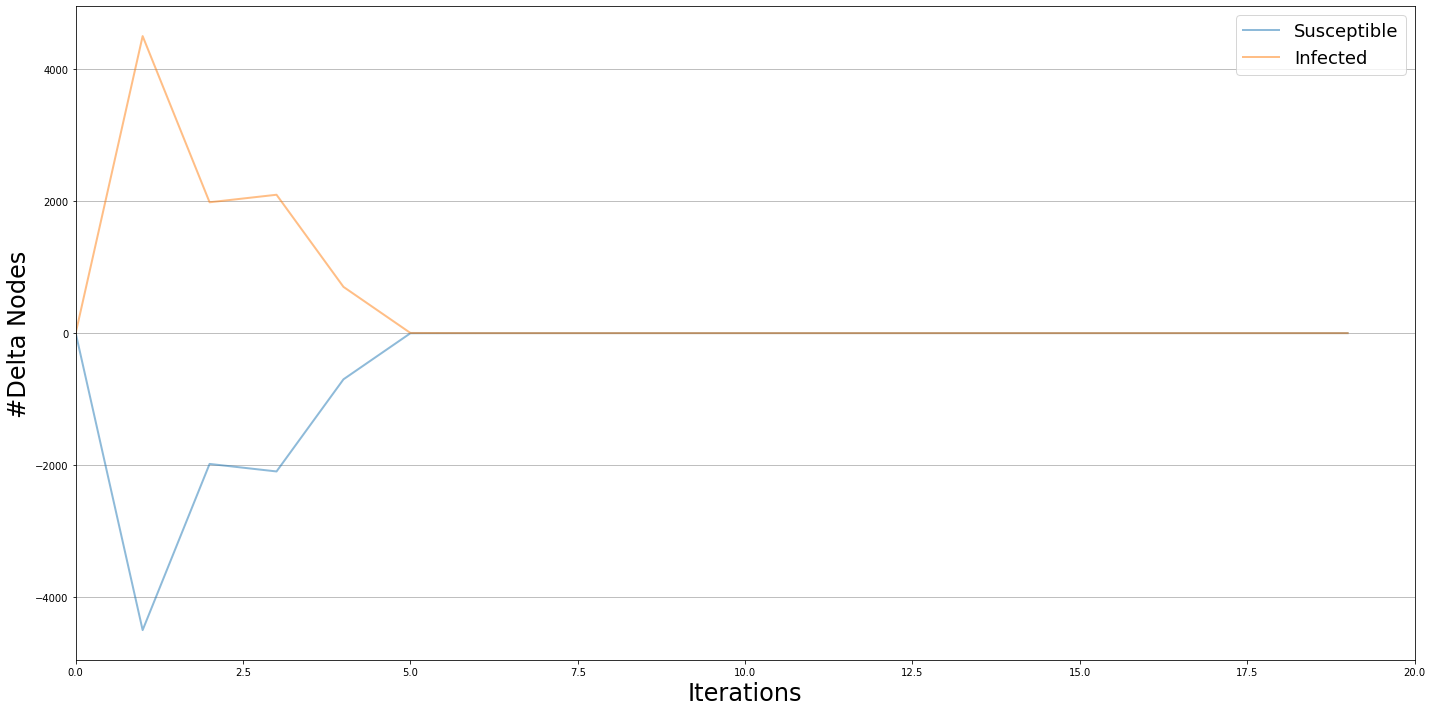

In [58]:
viz_t = DiffusionPrevalence(model_T, trends_T)
viz_t.plot()

## Comparing the Infection trends of different models

In [59]:
viz=DiffusionTrendComparison([model_SIR,model_SI,model_SIS],[trends_SIR,trends_SI,trends_SIS])#

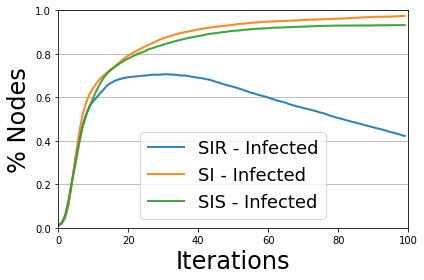

In [60]:
viz.plot()

# Comparison with ER graph

In [61]:
g = nx.erdos_renyi_graph(11110,226.9941/11110)
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 11110
Number of edges: 1260428
Average degree: 226.8997


In [62]:
model_SIR=ep.SIRModel(g)

In [63]:
model_SI=ep.SIModel(g)

In [64]:
model_SIS=ep.SISModel(g)

In [65]:
model_T=ep.ThresholdModel(g)

## 3 - Model Configuration

In [66]:
cfg_si=mc.Configuration()
cfg_sis=mc.Configuration()
cfg_sir=mc.Configuration()
cfg_thres=mc.Configuration()

In [67]:
cfg_si.add_model_parameter('beta', 0.005)#we put as beta a lower value because our contact are indirect
cfg_si.add_model_parameter("percentage_infected", 0.01)

In [68]:
cfg_sis.add_model_parameter('beta', 0.005)# in this case beta/gamma = R0 >1
cfg_sis.add_model_parameter('lambda',0.0001)
cfg_sis.add_model_parameter("percentage_infected", 0.01)

In [69]:
cfg_sir.add_model_parameter('beta', 0.005)
cfg_sir.add_model_parameter('gamma', 0.01)
cfg_sir.add_model_parameter("percentage_infected", 0.01)

In [70]:
cfg_thres.add_model_parameter("percentage_infected", 0.01)

##  Setting node parameters

In [71]:
def set_model_fun():#cfg miad ro model haee ke sakhtim status haso set mikone roye om model ha
    model_SIR.set_initial_status(cfg_sir)
    model_SI.set_initial_status(cfg_si)
    model_SIS.set_initial_status(cfg_sis)
    

In [72]:
def tsh_fun():#tabe e ke miad treshold ro hesab mikone 
    threshold = 0.01
    
    for i in g.nodes():
        cfg_thres.add_node_configuration("threshold", i, threshold)
    model_T.set_initial_status(cfg_thres)

In [73]:
tsh_fun()

In [74]:
set_model_fun()

## 4 - Simulation

In [75]:
iterations_SIR=model_SIR.iteration_bunch(100)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:24<00:00,  4.10it/s]


In [76]:
iterations_SI=model_SI.iteration_bunch(100)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.01it/s]


In [77]:
iterations_SIS=model_SIS.iteration_bunch(100)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:08<00:00, 12.41it/s]


In [78]:
iterations_T = model_T.iteration_bunch(20)

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 26.40it/s]


In [79]:
trends_SIR=model_SIR.build_trends(iterations_SIR)#motegayere tekrare on shabih sazimoneh bareye masir ro besazeh 

In [80]:
trends_SI=model_SI.build_trends(iterations_SI)

In [81]:
trends_SIS=model_SIS.build_trends(iterations_SIS)

In [82]:
trends_T = model_T.build_trends(iterations_T)

## 5 - Visualize the results

Diffusion trend plots

In [83]:
#The prevalence plot captures the variation (delta) of nodes for each status in consecutive iterations

In [84]:
viz_SIR = DiffusionTrend(model_SIR, trends_SIR)

In [85]:
viz_SI = DiffusionTrend(model_SI, trends_SI)

In [86]:
viz_SIS = DiffusionTrend(model_SIS, trends_SIS)

In [87]:
viz_T = DiffusionTrend(model_T, trends_T)

In [88]:
%matplotlib inline

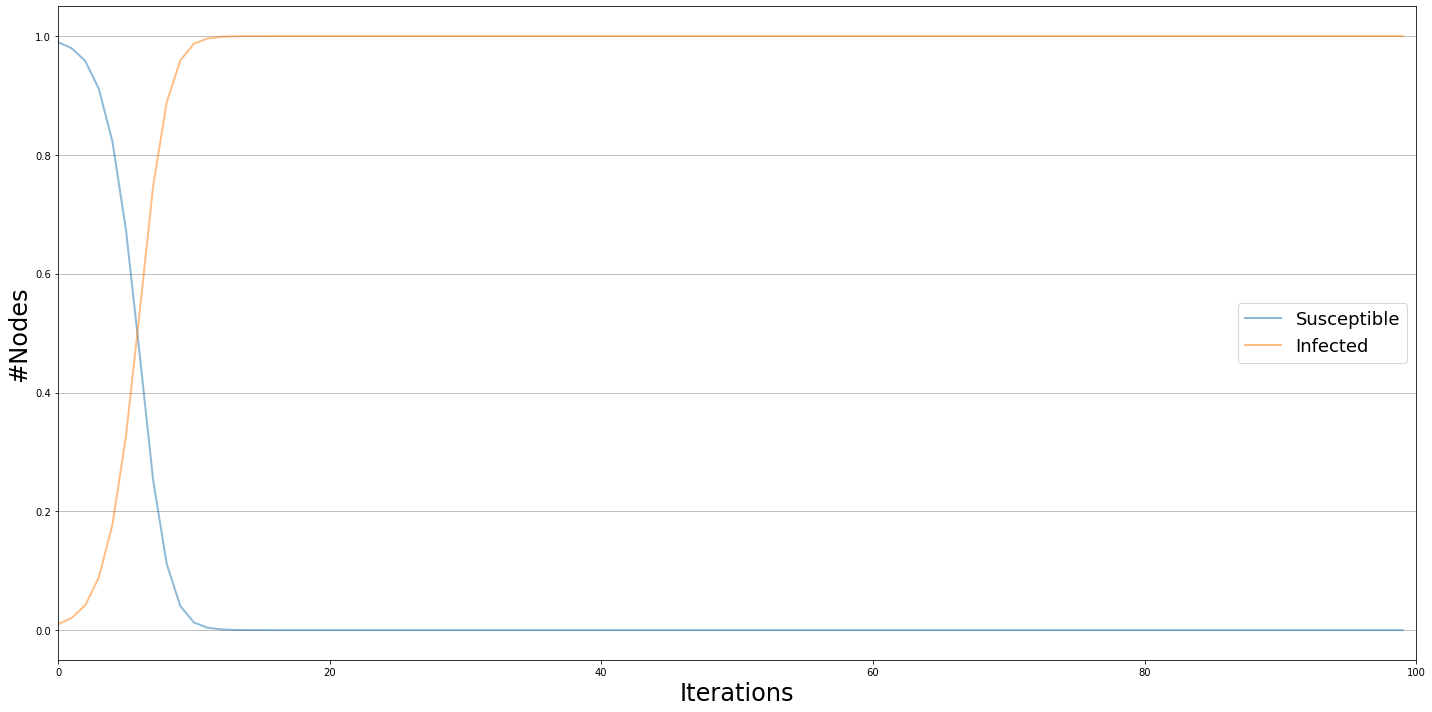

In [89]:
viz_SI.plot()

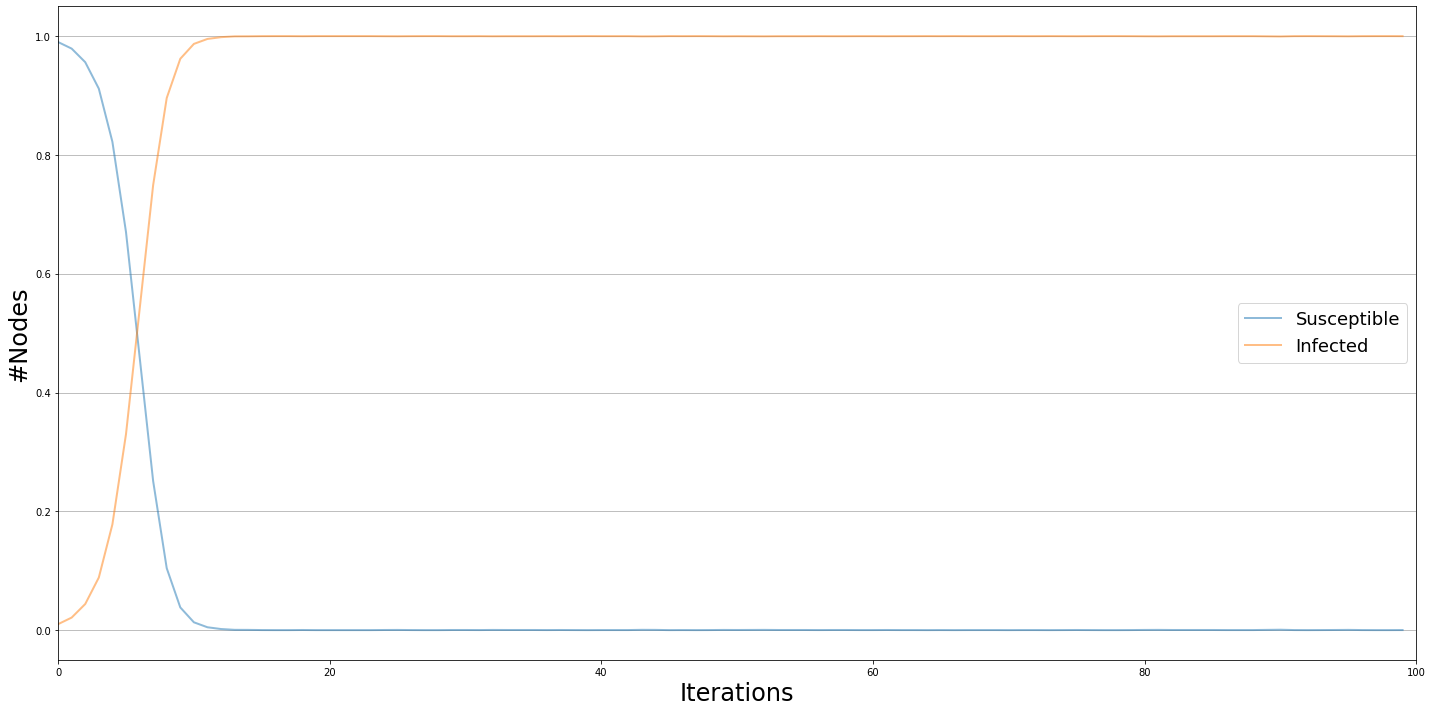

In [90]:
viz_SIS.plot()

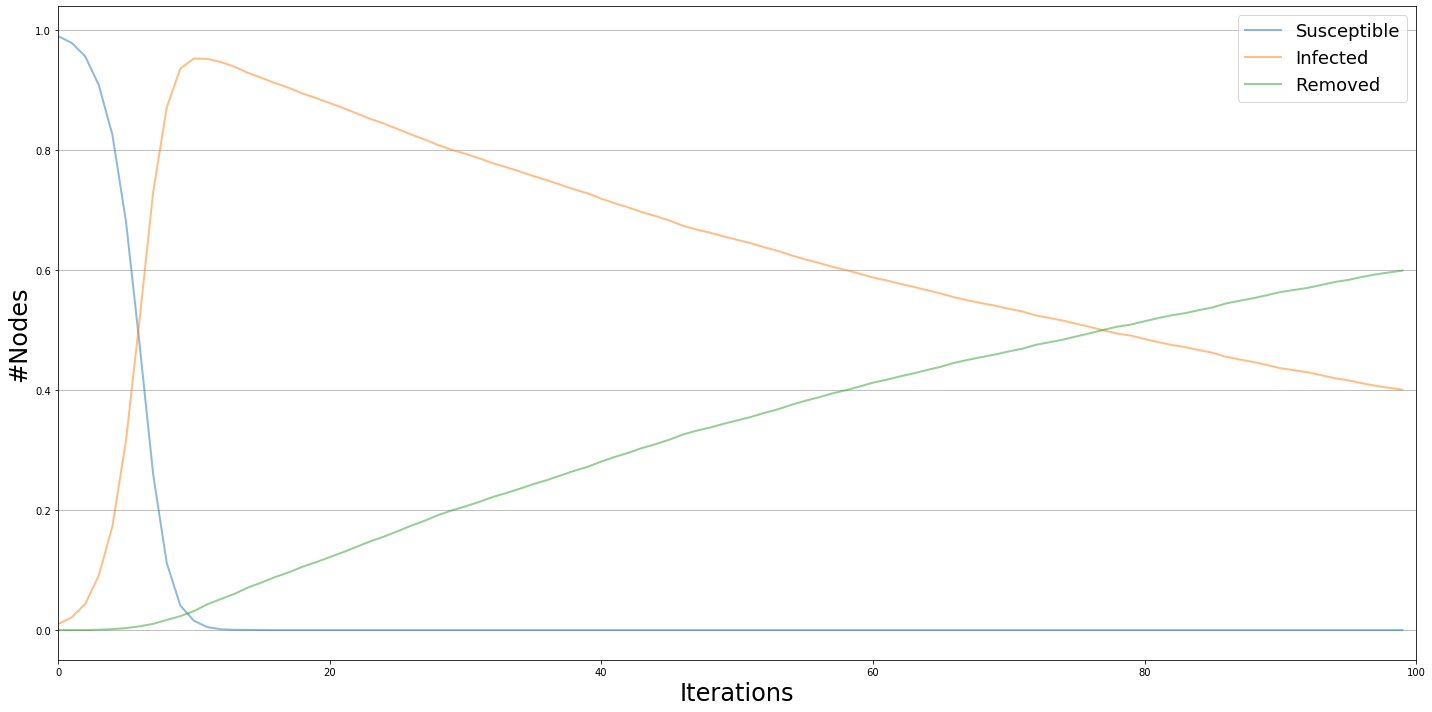

In [91]:
viz_SIR.plot()

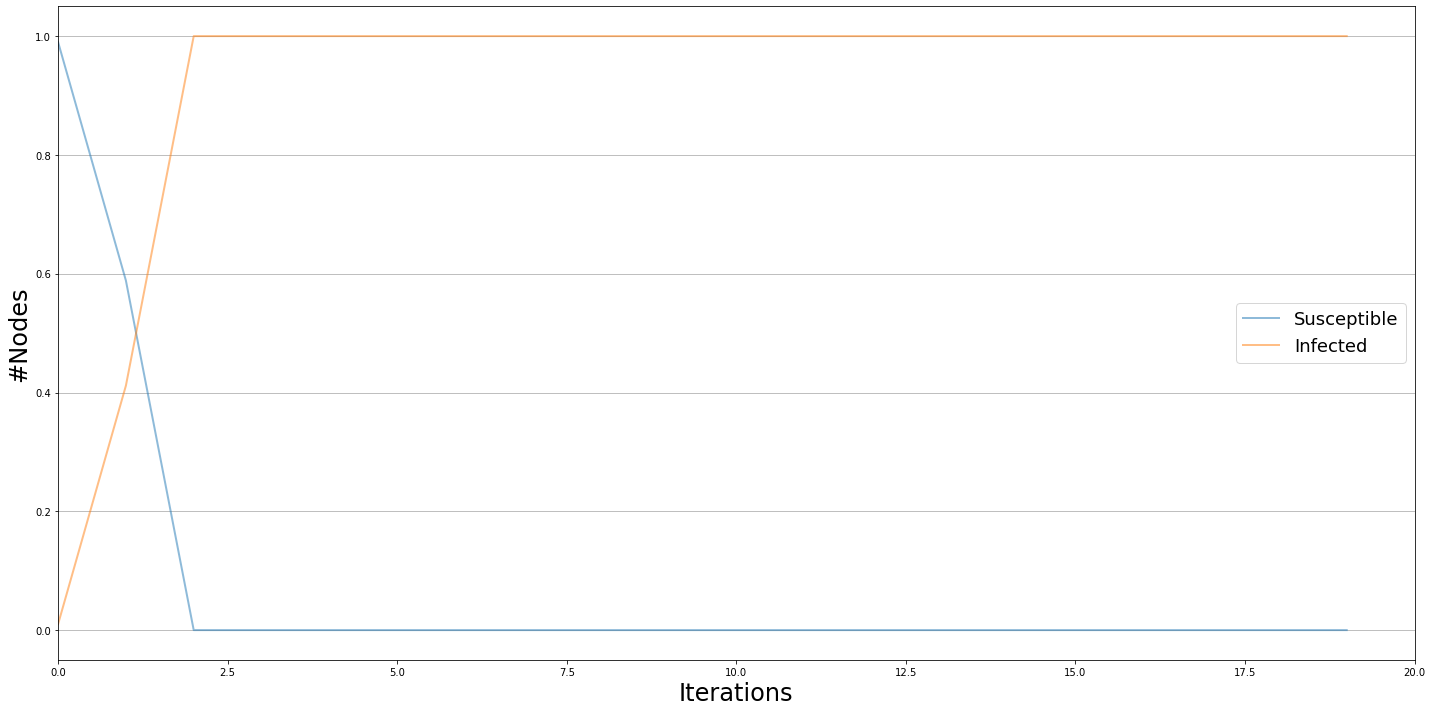

In [92]:
viz_T.plot()

Diffusion prevalence plots

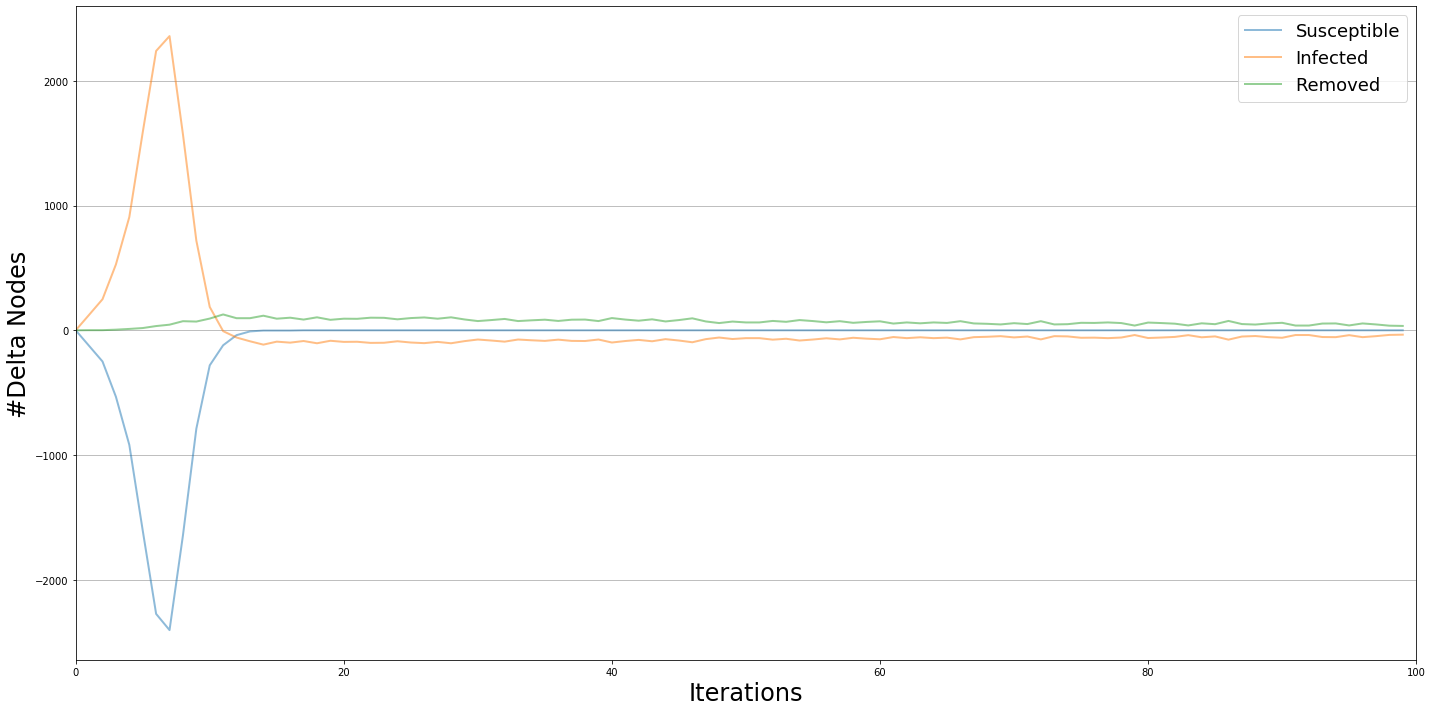

In [93]:
viz_sir = DiffusionPrevalence(model_SIR, trends_SIR)
viz_sir.plot()

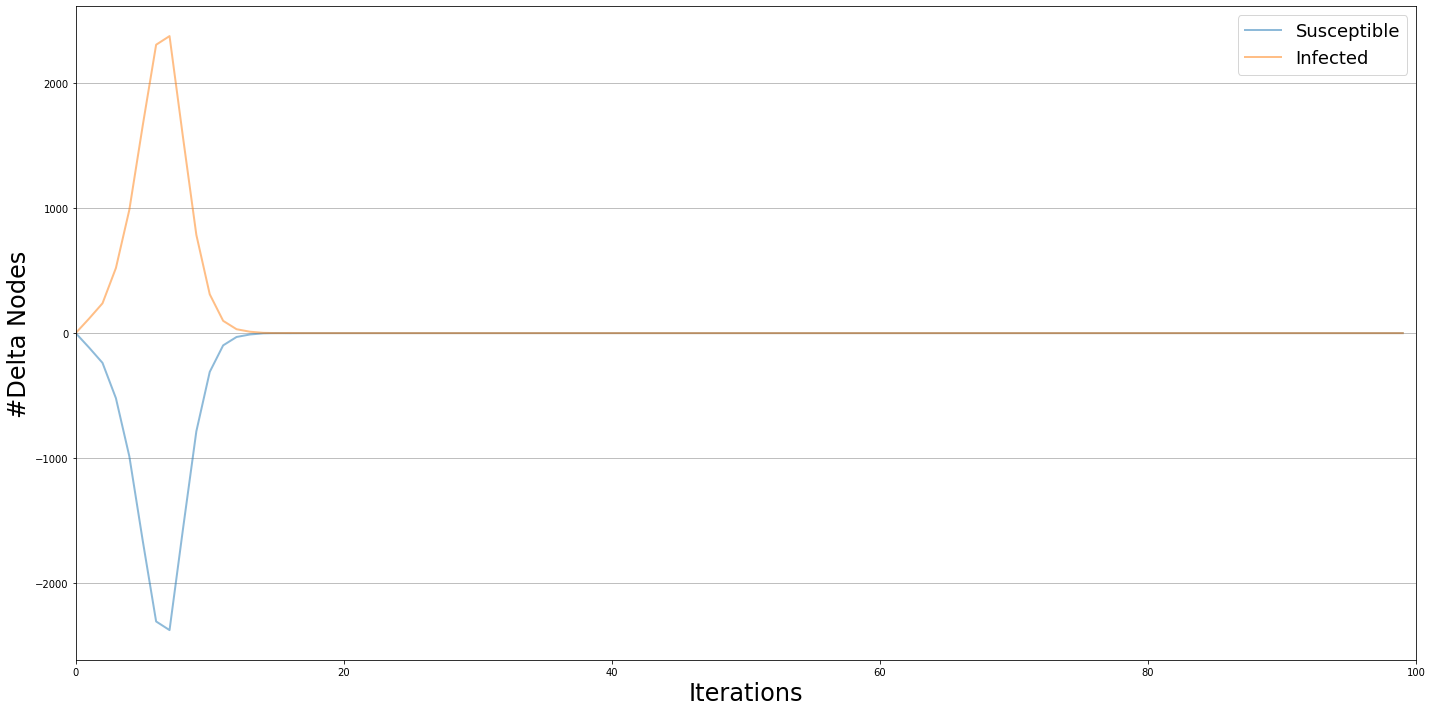

In [94]:
viz_si = DiffusionPrevalence(model_SI, trends_SI)
viz_si.plot()

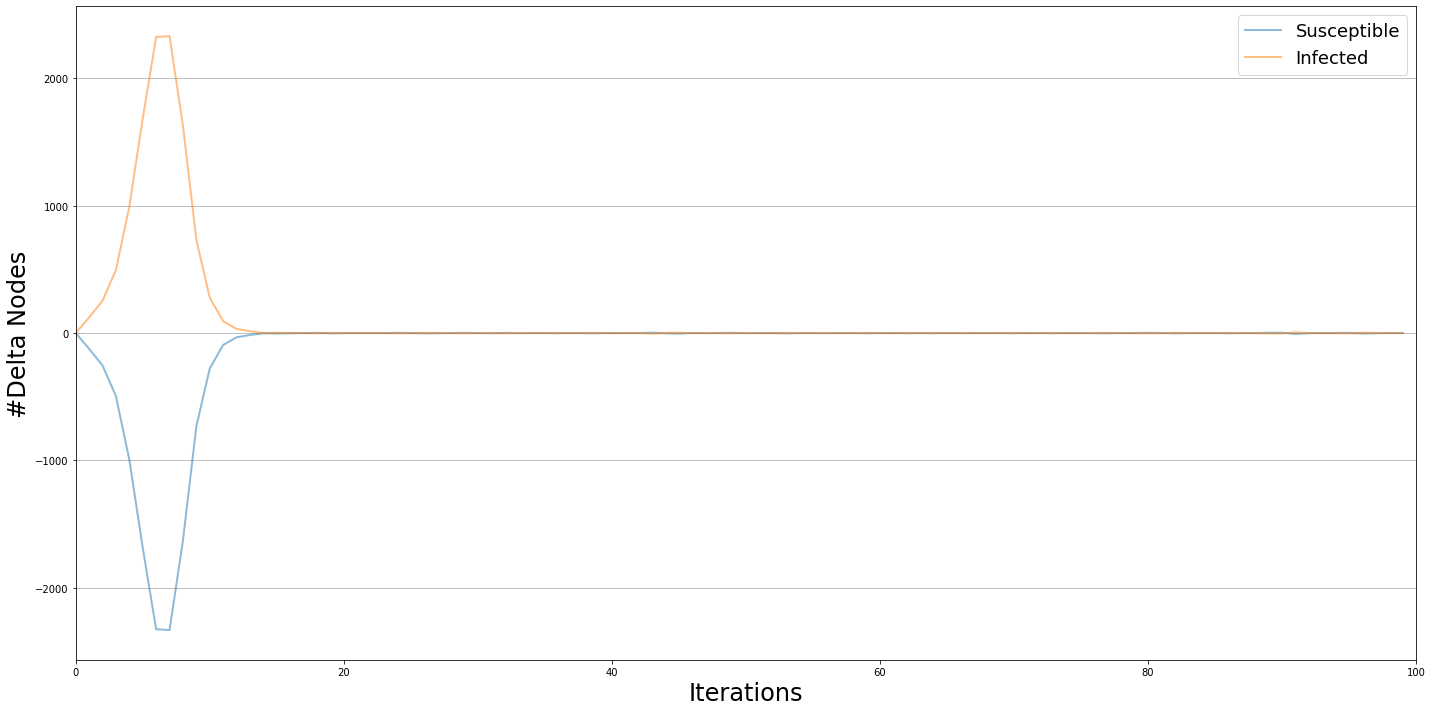

In [95]:
viz_sis = DiffusionPrevalence(model_SIS, trends_SIS)
viz_sis.plot()

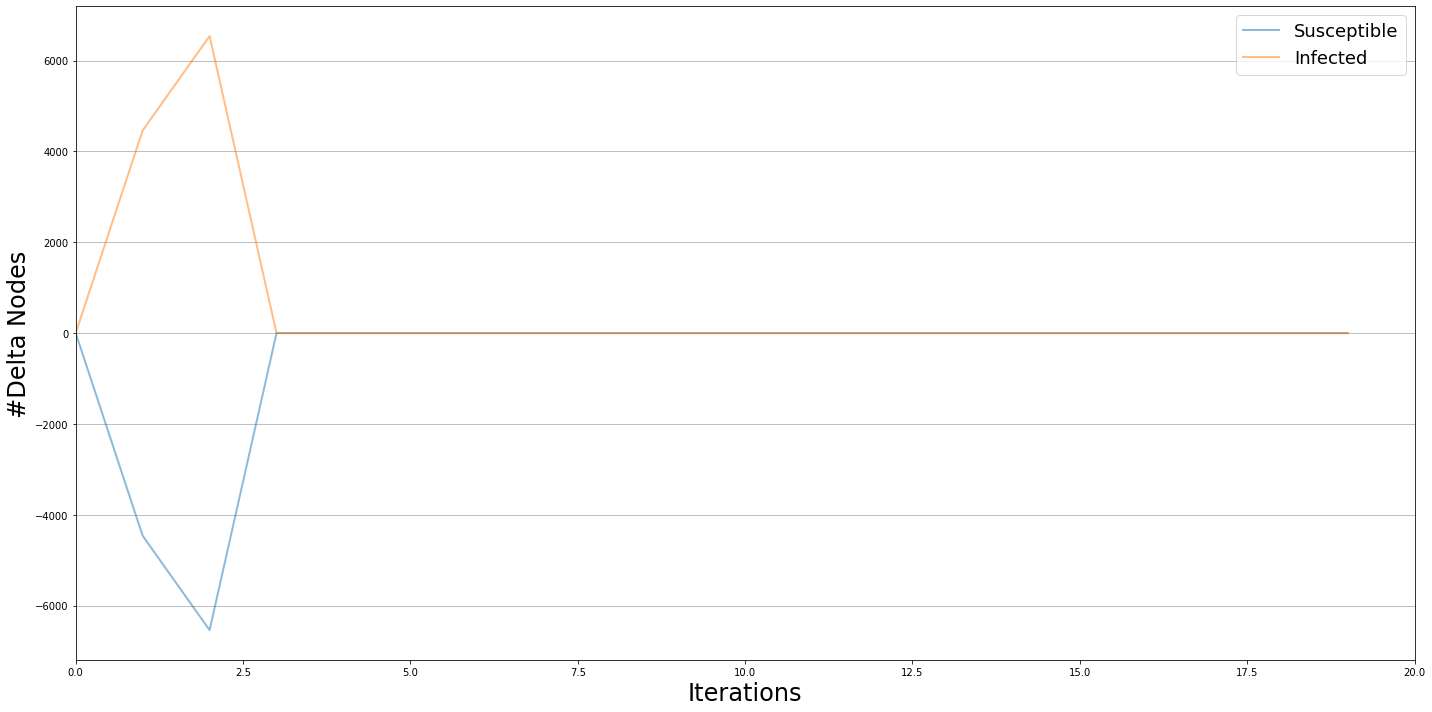

In [96]:
viz_t = DiffusionPrevalence(model_T, trends_T)
viz_t.plot()

## Comparing the Infection trends of different models

In [97]:
viz=DiffusionTrendComparison([model_SIR,model_SI,model_SIS],[trends_SIR,trends_SI,trends_SIS])#

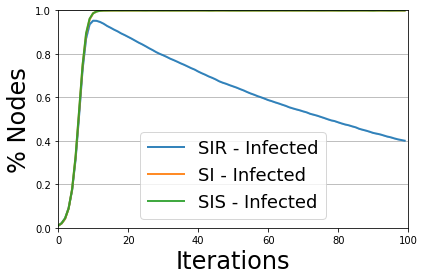

In [98]:
viz.plot()